## Data Analysis Project - BLINKIT Analysis

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Raw Data

In [2]:
df=pd.read_csv("F:/Python project/BlinkIT/blinkit_data.csv")

### Sample data 

In [3]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2010,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2000,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [4]:
df.tail()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
8518,low fat,NCT53,Health and Hygiene,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0
8522,reg,FDM58,Snack Foods,1998,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,112.2544,4.0


In [5]:
df.describe()

,Outlet Establishment Year,Item Visibility,Item Weight,Sales,Rating
count,8523.000000,8523.000000,7060.000000,8523.000000,8523.000000
mean,2010.831867,0.066132,12.857645,140.992782,3.965857
std,8.371760,0.051598,4.643456,62.275067,0.605651
min,1998.000000,0.000000,4.555000,31.290000,1.000000
25%,2000.000000,0.026989,8.773750,93.826500,4.000000
50%,2012.000000,0.053931,12.600000,143.012800,4.000000
75%,2017.000000,0.094585,16.850000,185.643700,4.200000
max,2022.000000,0.328391,21.350000,266.888400,5.000000


### Size of Data

In [6]:
df.shape

(8523, 12)

### Field Information

In [7]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

### Data Types

In [8]:
df.dtypes

Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object

### Data Cleaning

In [9]:
print(df['Item Fat Content'].unique())

['Regular' 'Low Fat' 'low fat' 'LF' 'reg']


In [10]:
df['Item Fat Content']=df['Item Fat Content'].replace({'low fat' : 'Low Fat',
                                                       'LF' : 'Low Fat',
                                                       'Low fat': 'Low Fat',
                                                      'reg': 'Regular'})

In [11]:
df['Item Fat Content']

0       Regular
1       Low Fat
2       Regular
3       Regular
4       Low Fat
         ...   
8518    Low Fat
8519    Low Fat
8520    Low Fat
8521    Regular
8522    Regular
Name: Item Fat Content, Length: 8523, dtype: object

### BUSINESS REQUIREMENTS

### KPI's REQUIREMENTS

In [12]:
# Total Sales

Total_sales =df['Sales'].sum()

# Average Sales

Average_Sales =df['Sales'].mean()

# Number of Items sold

Number_of_Items_sold=df['Sales'].count()

#Average Rating:

Average_Rating =df['Rating'].mean()

# Display

print(f"Total Sales: ${Total_sales :,.0f}")
print(f"Average Sales: ${Average_Sales :,.0f}")
print(f"Number of Items sold: {Number_of_Items_sold :,.0f}")
print(f"Average Rating: {Average_Rating :,.1f}")




Total Sales: $1,201,681
Average Sales: $141
Number of Items sold: 8,523
Average Rating: 4.0


### CHARTS REQUIREMENTS

#### Total sales by Fat content

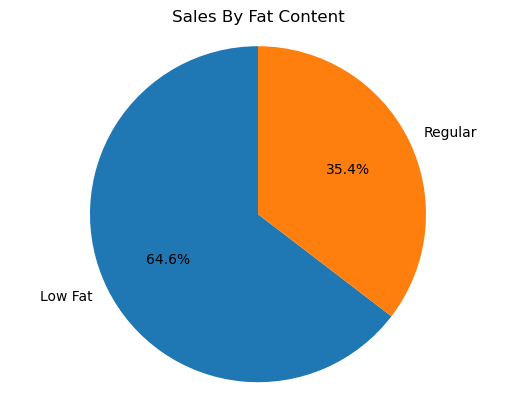

In [13]:
sales_by_fat= df.groupby('Item Fat Content')['Sales'].sum()

plt.pie(sales_by_fat,labels=sales_by_fat.index,autopct='%.1f%%',startangle=90)

plt.title("Sales By Fat Content")

plt.axis('equal')

plt.show( )

#### **Total sales by Item Type**

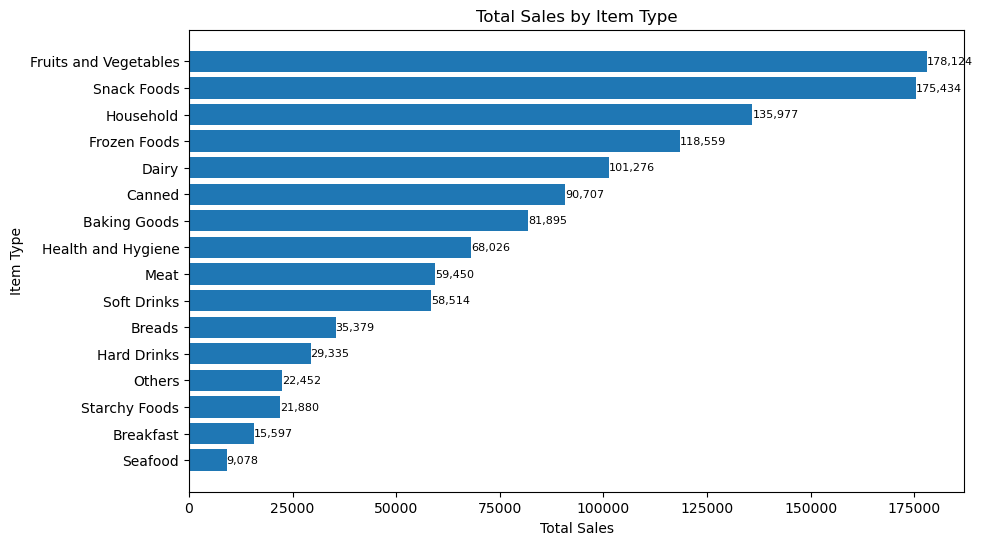

In [14]:
sales_by_item_type = (
    df.groupby('Item Type')['Sales']
      .sum()
      .sort_values(ascending=False) )

plt.figure(figsize=(10, 6))
bars=plt.barh(sales_by_item_type.index, sales_by_item_type.values)
plt.xlabel('Total Sales')
plt.ylabel('Item Type')
plt.title('Total Sales by Item Type')
plt.gca().invert_yaxis()
for bar in bars:
    width=bar.get_width()
    y=bar.get_y()+bar.get_height()/2
    plt.text(width,y,f'{width:,.0f}',va='center',ha='left',fontsize=8)
plt.show()

#### **Fat Content by outlet for total sales**

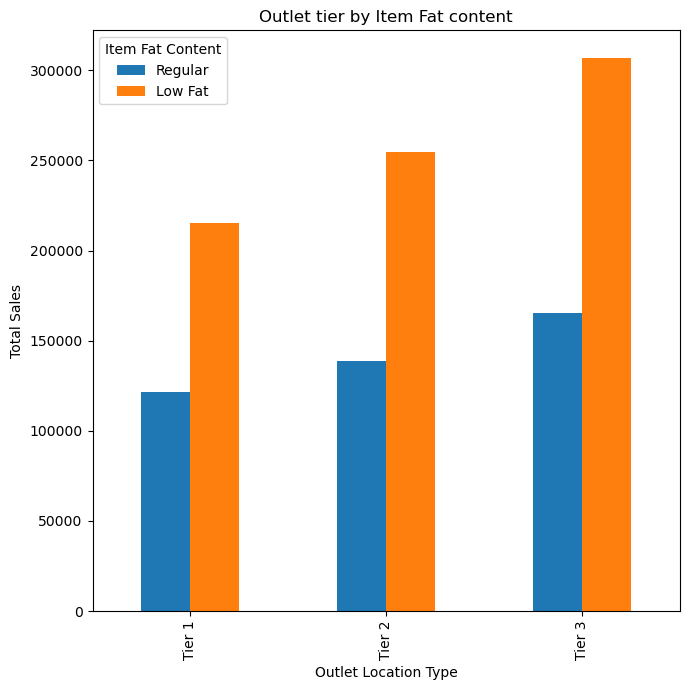

In [15]:
grouped= df.groupby(['Outlet Location Type','Item Fat Content'])['Sales'].sum().unstack()
grouped=grouped[['Regular','Low Fat']]

ax = grouped.plot(kind='bar',figsize=(7,7),title='Outlet tier by Item Fat content')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.legend(title='Item Fat Content')
plt.tight_layout()
plt.show()

#### **Total Sales by outlet Establishment**

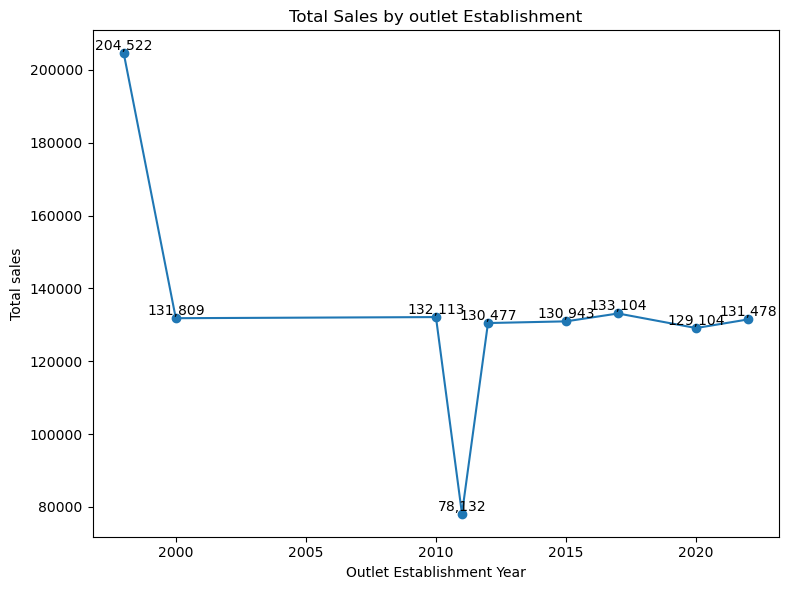

In [16]:
Sales_by_year=df.groupby('Outlet Establishment Year')['Sales'].sum().sort_index()
plt.figure(figsize=(8,6))
plt.plot(Sales_by_year.index,Sales_by_year.values,marker='o',linestyle='-')
plt.xlabel('Outlet Establishment Year')
plt.ylabel('Total sales')
plt.title('Total Sales by outlet Establishment')
for x,y in zip(Sales_by_year.index,Sales_by_year.values):
    plt.text(x,y,f'{y:,.0f}',ha='center',va='bottom',fontsize=10)

plt.tight_layout()
plt.show()

#### **Sales by Outlet Size**

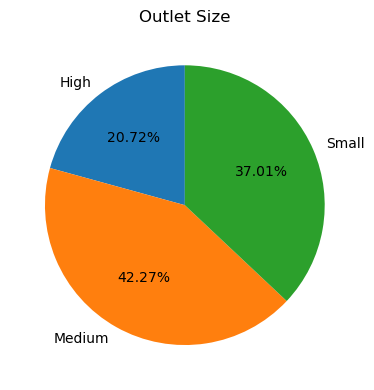

In [17]:
Sales_by_outlet_size=df.groupby('Outlet Size')['Sales'].sum()
plt.figure(figsize=(4,4))
plt.pie(Sales_by_outlet_size,labels=Sales_by_outlet_size.index,autopct='%1.2f%%',startangle=90)
plt.title('Outlet Size')
plt.tight_layout()
plt.show()

#### **Sales by Outlet Location**

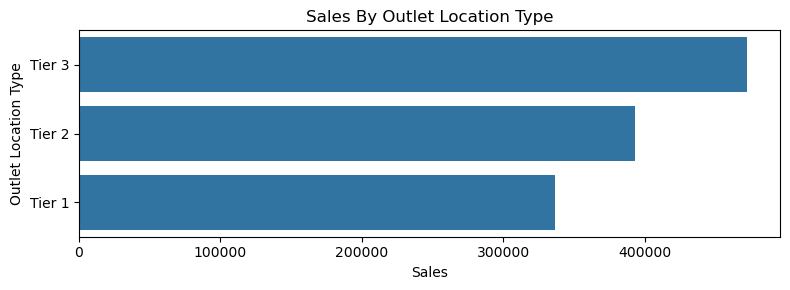

In [18]:
sales_by_location=df.groupby('Outlet Location Type')['Sales'].sum().reset_index()
sales_by_location=sales_by_location.sort_values('Sales',ascending=False)

plt.figure(figsize=(8,3))
ax=sns.barplot(x='Sales',y='Outlet Location Type',data=sales_by_location)


plt.title('Sales By Outlet Location Type')
plt.xlabel('Sales')
plt.ylabel('Outlet Location Type')
plt.tight_layout()

plt.show()